In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import netCDF4
from mpl_toolkits.basemap import Basemap


In [2]:
data_dir = '/Volumes/ATLAS/reanalysis/'
nc_file = 'NA_2m_temp_1900-2010.nc'
months = pd.date_range('1900-01-01','2010-12-01',freq='MS')

In [3]:
#load nc file
nc_temp = xr.open_dataset(data_dir+nc_file)

In [ ]:
map = Basemap(llcrnrlon=-116.,llcrnrlat=44.,urcrnrlon=-104.,urcrnrlat=55.)


In [ ]:
nc_temp

In [5]:
temp = nc_temp['t2m']

In [6]:
last_30 = temp.sel(time=slice('1981-01-01','2010-12-01'))

In [13]:
last_30

<xarray.DataArray 't2m' (time: 360, latitude: 81, longitude: 141)>
[4111560 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 230.0 230.5 231.0 231.5 232.0 232.5 233.0 ...
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 68.0 67.5 67.0 66.5 ...
  * time       (time) datetime64[ns] 1981-01-01 1981-02-01 1981-03-01 ...
Attributes:
    units: K
    long_name: 2 metre temperature

In [49]:
clim_norm = last_30.sel(time=last_30['time.month']==1).mean(dim='time')

In [50]:
clim_norm

<xarray.DataArray 't2m' (latitude: 81, longitude: 141)>
array([[ 246.0980018 ,  246.06754884,  246.03217029, ...,  245.382807  ,
         245.91309966,  246.44300683],
       [ 244.11397656,  244.03842238,  243.9623114 , ...,  245.37175656,
         245.86448628,  246.3573445 ],
       [ 243.76473123,  243.68155311,  243.59786101, ...,  245.36036347,
         245.81608707,  246.27159651],
       ..., 
       [ 288.6258368 ,  288.51674582,  288.39420586, ...,  292.11854701,
         292.1391488 ,  292.15979342],
       [ 288.8035433 ,  288.69946357,  288.59148621, ...,  292.42080654,
         292.43721088,  292.45374371],
       [ 288.99422765,  288.89211815,  288.8042286 , ...,  292.71441418,
         292.72649257,  292.73831397]])
Coordinates:
  * longitude  (longitude) float32 230.0 230.5 231.0 231.5 232.0 232.5 233.0 ...
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 68.0 67.5 67.0 66.5 ...

array([ 1,  2,  3, ..., 10, 11, 12], dtype=int32)

In [51]:
temp_jan = temp.sel(time=months.month==1)

In [52]:
temp_jan

<xarray.DataArray 't2m' (time: 111, latitude: 81, longitude: 141)>
[1267731 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float32 230.0 230.5 231.0 231.5 232.0 232.5 233.0 ...
  * latitude   (latitude) float32 70.0 69.5 69.0 68.5 68.0 67.5 67.0 66.5 ...
  * time       (time) datetime64[ns] 1900-01-01 1901-01-01 1902-01-01 ...
Attributes:
    units: K
    long_name: 2 metre temperature

In [53]:
test  = temp_jan - clim_norm

In [54]:
anom = test.mean(dim=['latitude','longitude'])


In [55]:
anom

<xarray.DataArray 't2m' (time: 111)>
array([-2.85178324, -3.83815753, -2.7681404 , -1.48251938, -2.29332065,
       -2.48396243, -1.85688154, -3.39426993, -1.66827984, -3.72663584,
       -1.98133471, -4.60469835, -5.48457999, -3.7270637 , -2.31869466,
       -2.17645806, -3.08408207, -4.64317642,  0.17140916, -2.04396283,
       -4.00143236, -1.70036823, -2.72382044, -2.8618511 , -2.63617473,
       -3.47975   , -0.8303552 , -3.27726491, -1.25637893, -2.68316245,
       -3.09926097,  0.45695972, -2.03816751, -2.53828746, -0.79940527,
       -4.00836928, -3.09743803, -3.36584453, -0.36746371, -1.47351583,
       -0.55639966, -0.39232019, -0.52870184, -3.55429558,  1.17837065,
       -0.1055351 , -1.90173602, -1.14181506, -1.25824867, -3.40179661,
       -4.37481459, -1.7016328 , -3.11845321, -1.20419061, -4.82883766,
       -0.64759607, -0.33236927, -3.7463726 ,  0.41238257, -1.12962433,
       -0.65947494, -2.6479663 , -2.90347597, -2.73204589, -0.85483444,
       -0.96538014, -3.1718

In [ ]:
anom.coords['time']

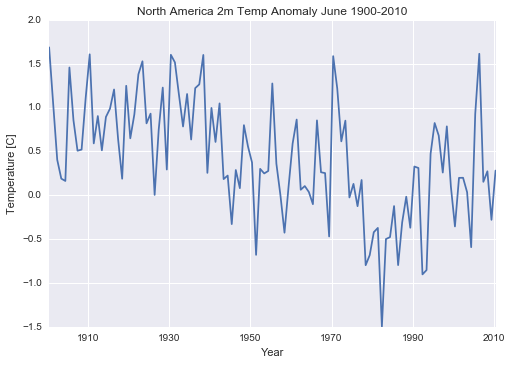

In [44]:
fig, ax = plt.subplots();
plt.plot(anom['time'],anom.values);
ax.set_title('North America 2m Temp Anomaly June 1900-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [C]')
fig.savefig('2m_temp_june_na.png')



In [ ]:
fig.get_size_inches()

In [57]:
montana = test.sel(latitude=np.arange(44,55,step=.5))

In [58]:
montana = montana.sel(longitude=np.arange(240,260,step=.5))


In [ ]:
montana

In [59]:
mon_anom = montana.mean(dim=['latitude','longitude'])

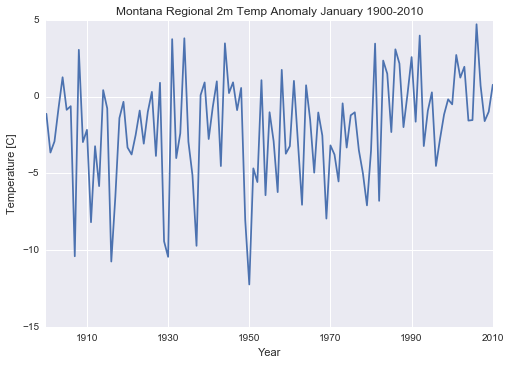

In [60]:
fig, ax = plt.subplots();
plt.plot(mon_anom['time'],mon_anom.values);
ax.set_title('Montana Regional 2m Temp Anomaly January 1900-2010')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [C]')
fig.savefig('2m_temp_montana_jan.png')

In [ ]:
montana.to_dataset().to_netcdf(data_dir+'jan_montana_temp_anomaly.nc')